In [3]:
import pandas_datareader as pdr

In [5]:
df = pdr.get_data_tiingo('AAPL', api_key="enter actual key here")

/opt/anaconda3/lib/python3.9/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  return pd.concat(dfs, self._concat_axis)


In [6]:
df.to_csv("AAPL.csv")

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("AAPL.csv")

In [21]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-02-19 00:00:00+00:00,170.93,171.44,169.49,169.71,18972826,41.137246,41.259986,40.790685,40.843632,75891304,0.0,1.0
1,AAPL,2019-02-20 00:00:00+00:00,172.03,173.32,170.99,171.19,26114362,41.401980,41.712440,41.151686,41.199819,104457448,0.0,1.0
2,AAPL,2019-02-21 00:00:00+00:00,171.06,172.37,170.30,171.80,17249670,41.168532,41.483806,40.985625,41.346626,68998680,0.0,1.0
3,AAPL,2019-02-22 00:00:00+00:00,172.97,173.00,171.38,171.58,18913154,41.628207,41.635427,41.245546,41.293679,75652616,0.0,1.0
4,AAPL,2019-02-25 00:00:00+00:00,174.23,175.87,173.95,174.16,21873358,41.931447,42.326142,41.864061,41.914601,87493432,0.0,1.0


In [12]:
df1 = df.reset_index()['close']

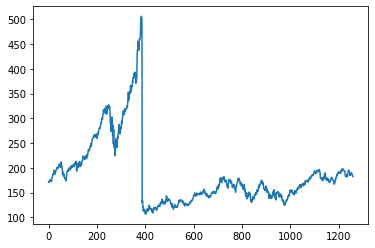

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [14]:
import numpy as np

In [18]:
df["splitFactor"].value_counts()

1.0    1258
4.0       1
Name: splitFactor, dtype: int64

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
df1

array([[0.16052599],
       [0.16328115],
       [0.1608516 ],
       ...,
       [0.19363807],
       [0.19291171],
       [0.18902943]])

In [22]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [23]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [24]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 4s 174ms/step - loss: 0.0315 - val_loss: 0.0011
Epoch 2/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0143 - val_loss: 6.4263e-04
Epoch 3/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0102 - val_loss: 3.6375e-04
Epoch 4/100
12/12 [==============================] - 1s 119ms/step - loss: 0.0090 - val_loss: 2.6287e-04
Epoch 5/100
12/12 [==============================] - 1s 120ms/step - loss: 0.0079 - val_loss: 2.3417e-04
Epoch 6/100
12/12 [==============================] - 1s 120ms/step - loss: 0.0093 - val_loss: 0.0015
Epoch 7/100
12/12 [==============================] - 1s 124ms/step - loss: 0.0072 - val_loss: 0.0012
Epoch 8/100
12/12 [==============================] - 1s 121ms/step - loss: 0.0067 - val_loss: 2.7011e-04
Epoch 9/100
12/12 [==============================] - 1s 121ms/step - loss: 0.0060 - val_loss: 2.4938e-04
Epoch 10/100
12/12 [==============================] - 1s 122ms/step

In [30]:
import tensorflow as tf

In [31]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 23ms/step


In [32]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

215.72428207563593

In [34]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

164.79955348985806

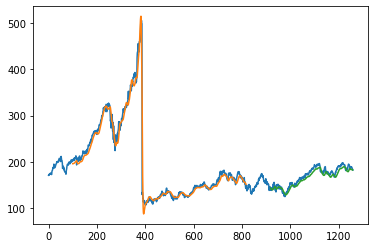

In [35]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()